# Génération d'idées de recettes selon ce que l'on a chez soi

### Projet Python - 2A ENSAE

Projet réalisé par BRESSON Claire, CASSANT Emile, MEKKI Lila

## Introduction 

Notre objectif était de faciliter la tâche à ceux qui ne savent pas quoi manger alors que leur frigo n'est pas vide, et qui cherchent des idées de recettes à réaliser à la maison. 

## I. Récupération des données ingrédients 

Pour récupérer la liste des ingrédients disponibles dans la grande distribution, nous avons trouvé deux bases de données principales : l'OpenFoodFacts et Ciqual. La base de données d'OpenFoodFacts était cependant trop conséquente, donc nous avons choisi de nous concentrer sur la base Ciqual, plus petite. 

In [59]:
import pandas as pd 
import matplotlib.pyplot as plt

In [28]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [48]:
# Lien du fichier et affichage 

data_ciqual = pd.read_excel("https://ciqual.anses.fr/cms/sites/default/files/inline-files/Table%20Ciqual%202020_FR_2020%2007%2007.xls") 
data_ciqual.head()

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_sci,"Energie, Règlement UE N° 1169/2011 (kJ/100 g)",...,Vitamine K1 (µg/100 g),Vitamine K2 (µg/100 g),Vitamine C (mg/100 g),Vitamine B1 ou Thiamine (mg/100 g),Vitamine B2 ou Riboflavine (mg/100 g),Vitamine B3 ou PP ou Niacine (mg/100 g),Vitamine B5 ou Acide pantothénique (mg/100 g),Vitamine B6 (mg/100 g),Vitamine B9 ou Folates totaux (µg/100 g),Vitamine B12 (µg/100 g)
0,0,0,0,NaN,NaN,NaN,24999,Dessert (aliment moyen),NaN,NaN,...,NaN,NaN,"1,37","0,084","0,15","0,61","0,4","0,056","30,8","0,21"
1,1,101,0,entrées et plats composés,salades composées et crudités,-,25601,"Salade de thon et légumes, appertisée",NaN,-,...,-,-,"2,75","< 0,04","0,053","4,45","< 0,16","0,29",31,"1,45"
2,1,101,0,entrées et plats composés,salades composées et crudités,-,25602,"Salade composée avec viande ou poisson, appert...",NaN,-,...,"9,75",-,-,"0,032","0,022","4,13","0,2","0,12","11,1","1,23"
3,1,101,0,entrées et plats composés,salades composées et crudités,-,25605,"Champignons à la grecque, appertisés",NaN,-,...,-,-,"6,67","0,056","0,21","1,84","0,88","0,088","19,6","0,018"
4,1,101,0,entrées et plats composés,salades composées et crudités,-,25606,"Salade de pommes de terre, fait maison",NaN,-,...,-,-,10,"0,077","0,06","0,89","0,53","0,14",7,0


On décide de ne garder que les colonnes contenant le nom de l'aliment, son apport énérgétique, ainsi que certains substrats énergétiques courants (Glucides, Protéines,...). 

In [49]:
data_ciqual = data_ciqual[['alim_grp_nom_fr','alim_nom_fr','Energie, Règlement UE N° 1169/2011 (kJ/100 g)',
       'Energie, Règlement UE N° 1169/2011 (kcal/100 g)',
       'Protéines, N x 6.25 (g/100 g)', 'Glucides (g/100 g)',
       'Lipides (g/100 g)', 'Sucres (g/100 g)', 'Fructose (g/100 g)',
       'Glucose (g/100 g)', 'Lactose (g/100 g)','Saccharose (g/100 g)', 'Amidon (g/100 g)']]
#data_ciqual.head()

On renomme les colonnes pour plus de lisibilité.

In [54]:
new_names = {
    'alim_grp_nom_fr': 'Groupe',
    'alim_nom_fr': 'Nom aliment',
    'Energie, Règlement UE N° 1169/2011 (kJ/100 g)':'Energie kJ',
    'Energie, Règlement UE N° 1169/2011 (kcal/100 g)': 'Energie kcal',
    'Protéines, N x 6.25 (g/100 g)': 'Protéines',
    'Glucides (g/100 g)': 'Glucides',
    'Lipides (g/100 g)' : 'Lipides',
    'Sucres (g/100 g)'  : 'Sucres',
    'Fructose (g/100 g)': 'Fructose',
    'Glucose (g/100 g)' : 'Glucose',
    'Lactose (g/100 g)' : 'Lactose',
    'Saccharose (g/100 g)': 'Saccharose',
    'Amidon (g/100 g)'  : 'Amidon'
}

data_ciqual.rename(columns=new_names, inplace=True)

In [55]:
data_ciqual["Groupe"].unique()

array([nan, 'entrées et plats composés',
       'fruits, légumes, légumineuses et oléagineux',
       'produits céréaliers', 'viandes, œufs, poissons et assimilés',
       'produits laitiers et assimilés', 'eaux et autres boissons',
       'produits sucrés', 'glaces et sorbets', 'matières grasses',
       'aides culinaires et ingrédients divers', 'aliments infantiles'],
      dtype=object)

Nous voulons nous concentrer sur les aliments non transformés étant donné que l'on veut élaborer une recette nous-mêmes. Nous éliminons également les boissons et aliments infantiles. Nous garons les 'produits sucrés', bien qu'ils contiennent de nombreux produits transformés, car ils contiennent également des produits tels que 'spéculoos', qui peuvent être utiles dans les recettes. 

In [71]:
#Suppression de certains groupes alimentaires 

mask = data_ciqual['Groupe'].isin(['entrées et plats composés', 'eaux et autres boissons', 'aliments infantiles'])
data_ciqual = data_ciqual.drop(data_ciqual[mask].index)
data_ciqual.head()

,Groupe,Nom aliment,Energie kJ,Energie kcal,Protéines,Glucides,Lipides,Sucres,Fructose,Glucose,Lactose,Saccharose,Amidon
0,NaN,Dessert (aliment moyen),NaN,NaN,"4,61","36,6","12,9","23,7","1,81","2,18","1,89","15,7","9,53"
338,"fruits, légumes, légumineuses et oléagineux","Avocat, pulpe, cru",843,205,"1,56","0,83","20,6","0,4","0,16","0,16","< 0,2","< 0,2","< 0,35"
339,"fruits, légumes, légumineuses et oléagineux","Bette ou blette, crue","68,3","16,4",1,"1,63","< 0,5","1,2","0,5","0,7","< 0,2","< 0,2","< 0,35"
340,"fruits, légumes, légumineuses et oléagineux","Carotte, crue",169,"40,2","0,63","7,59","< 0,5",6,"0,9","1,1","< 0,2",4,"0,4"
341,"fruits, légumes, légumineuses et oléagineux","Champignon, tout type, cru","91,2","21,7","2,37","1,88","0,23","1,43","0,17","0,82",0,"< 0,1",0


Afin de pouvoir exploiter les données sur les apports énergétiques, nous regardons les proportions de NaN dans les différentes colonnes relatives aux apports. 

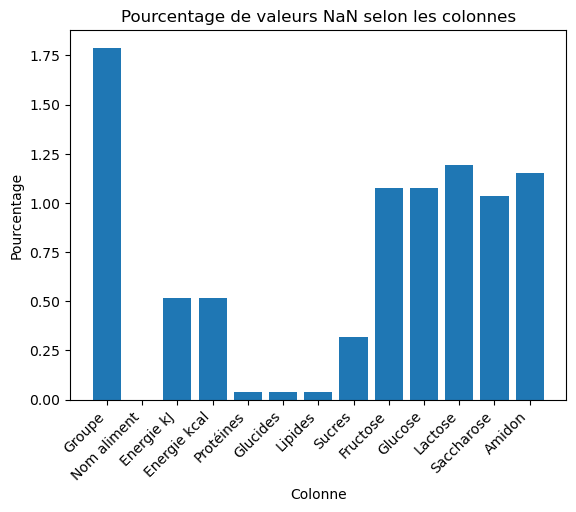

In [80]:
# Calcul des données manquantes selon les différentes colonnes

n = len(data_ciqual)
percentages = []
for col in (list(data_ciqual.columns)):
    percentages.append(((data_ciqual[col].isna()).sum()/n)*100)
plt.bar(data_ciqual.columns, percentages)
plt.xlabel('Colonne')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45, ha='right')
plt.title('Pourcentage de valeurs NaN selon les colonnes')
plt.show()

Les valeurs principales qui nous intéressent sont dans un premier temps le nom des aliments étant donné que l'on veut un matching avec les noms d'aliments présents dans les recettes sur Marmiton. Dans un second temps, si nous voulons traiter l'apport énergétique nous nous intéresserons également à ces données. 
Les résultats sont donc très satisfaisants car il n'y a aucun nom d'aliment manquant et les apports sont manquants à hauteur de seulement 1%.